In [33]:
from bigraph_viz.plot_old import plot_bigraph
from bigraph_viz import replace_regex_recursive

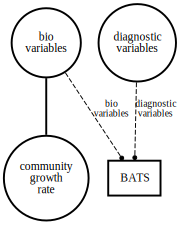

In [38]:
BATS = {
    'BATS': {
        '_type': 'process',
        'wires': {
            # 'community growth': ['community growth rate',],
            'bio variables': ['bio variables',],
            'diagnostic variables': ['diagnostic variables',],
        }
    },
    'bio variables': {
        'community growth rate': ''
        # 'bacteria carbon': '',
        # 'bacteria nitrogen': '',
        # 'bacteria phosphorus': '',
    }
}

BATS = replace_regex_recursive(BATS)
plot_bigraph(BATS)

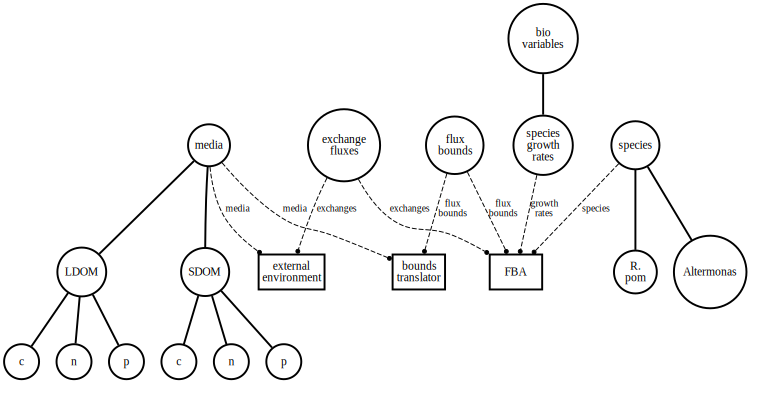

In [35]:
# exchanges unit mmol/gDCW/hr

DFBA = {
    'FBA': {
        '_type': 'process',
        'wires': {
            # 'media': ['media',],
            'species': ['species',],
            'growth rates': ['bio variables', 'species growth rates',],
            'exchanges': ['exchange fluxes',],
            'flux bounds': ['flux bounds'],
        }
    },
    'bounds translator': {
        '_type': 'process',
        'wires': {
            'media': ['media',],
            'flux bounds': ['flux bounds'],
        }
    },
    'external environment': {
        '_type': 'process',
        'wires': {
            'exchanges': ['exchange fluxes',],
            'media': ['media',],
        }
    },
    'media': {
        'LDOM': {
            'c': 'mmol/m3',
            'n': 'mmol/m3',
            'p': 'mmol/m3',
        },
        'SDOM': {
            'c': 'mmol/m3',
            'n': 'mmol/m3',
            'p': 'mmol/m3',
        }
    },
    # 'exchanges': {
    #    'co2': 'conc'
    # },
    'bio variables': {
        'species growth rates': 'mmol/gDCW/hr'
    },
    'species': {
        'Altermonas': 'bacteria',
        'R. pom': 'bacteria'
    }
}

DFBA = replace_regex_recursive(DFBA)
plot_bigraph(DFBA)

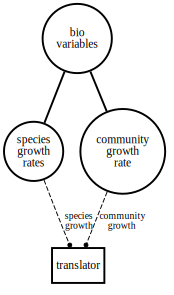

In [40]:
translator = {
    'translator': {
        '_type': 'process',
        'wires': {
            'species growth': ['bio variables', 'species growth rates',],
            'community growth': ['bio variables', 'community growth rate',],
        }
    },
    'bio variables': {
        'species growth rates': 'mmol/gDCW/hr',
        'community growth rate': 'mmol/gDCW/hr',
    },
}

translator = replace_regex_recursive(translator)
plot_bigraph(translator)

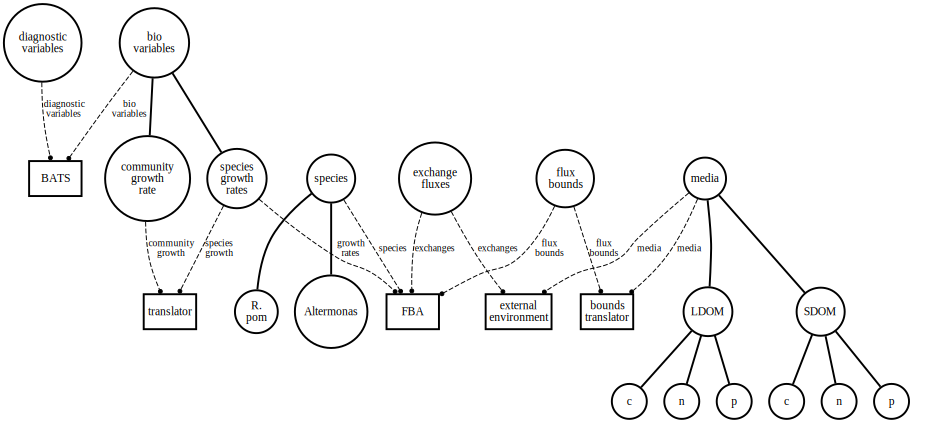

In [41]:
hybrid_model = {
    **BATS, **DFBA, **translator
}

plot_bigraph(hybrid_model)